In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\shrey\Desktop\Power bi\train.csv")
df.shape

(550068, 12)

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
pd.isnull(df).sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
df.shape

(550068, 12)

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(166821, 12)

In [11]:
pd.isnull(df).sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [14]:
df[['Purchase']].describe()

,Purchase
count,166821.000000
mean,11658.114980
std,5082.287959
min,185.000000
25%,7869.000000
50%,11756.000000
75%,15626.000000
max,23959.000000


### EDA


In [16]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### Gender


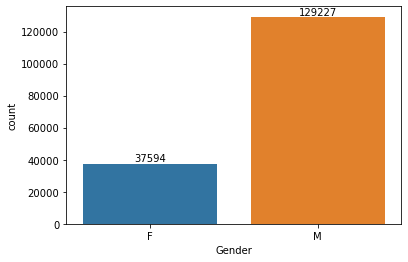

In [17]:
ax= sns.countplot(x='Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

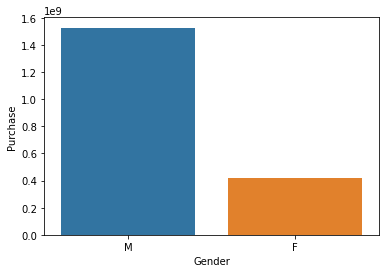

In [20]:
sale_gen = df.groupby(['Gender'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)
sns.barplot(x='Gender', y= 'Purchase', data= sale_gen)

##### from the above graphs we can see most of the buyers are men. 

### Gender

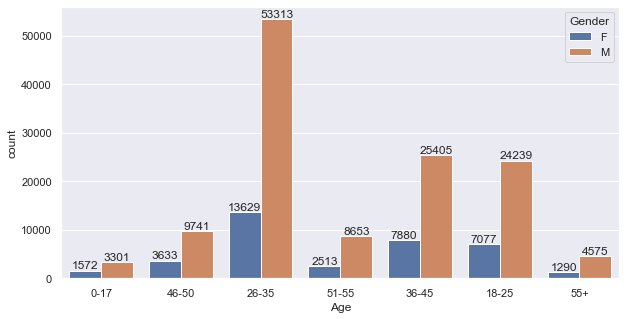

In [28]:
ax =sns.countplot(data=df,x='Age',hue='Gender')
sns.set(rc={'figure.figsize':(6,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

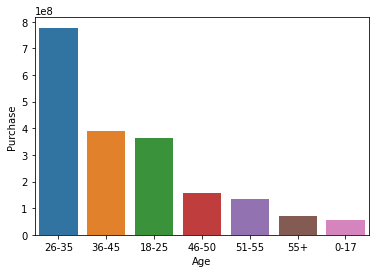

In [24]:
sale_age=df.groupby(['Age'],as_index=False)['Purchase'].sum().sort_values(by='Purchase',ascending=False)
sns.barplot(x='Age', y= 'Purchase',data=sale_age)

#### From the above graph we can say most of the buyers are in age grop of 26-35


### City

In [25]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<AxesSubplot:xlabel='City_Category', ylabel='Product_Category_1'>

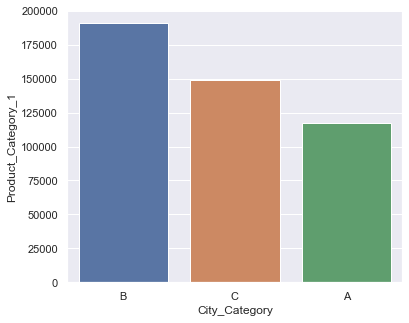

In [30]:
cat_city=df.groupby(['City_Category'],as_index=False)['Product_Category_1'].sum().sort_values(by='Product_Category_1',ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='City_Category', y= 'Product_Category_1',data=cat_city)


<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

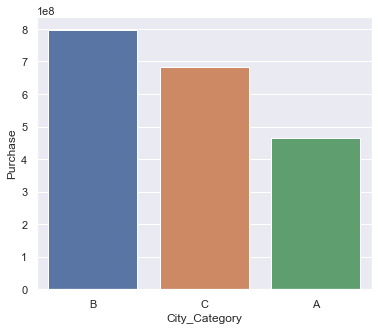

In [32]:
sale_city=df.groupby(['City_Category'],as_index=False)['Purchase'].sum().sort_values(by='Purchase',ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='City_Category', y= 'Purchase',data=sale_city)

#### from the graph we can conculde large number of sales come from city B

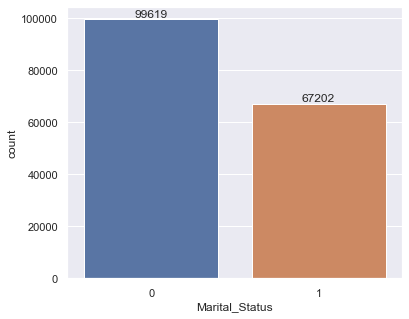

In [35]:
ax =sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize':(6,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

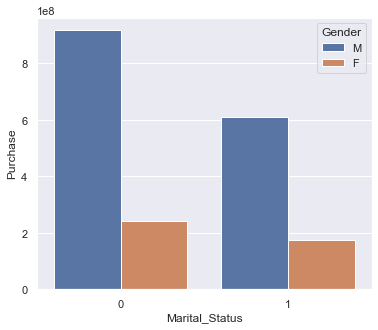

In [39]:
sale_mar=df.groupby(['Marital_Status','Gender'],as_index=False)['Purchase'].sum().sort_values(by='Purchase',ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='Marital_Status', y= 'Purchase',data=sale_mar, hue='Gender')

#### The most amount is spent by married men

### Occupation


In [40]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

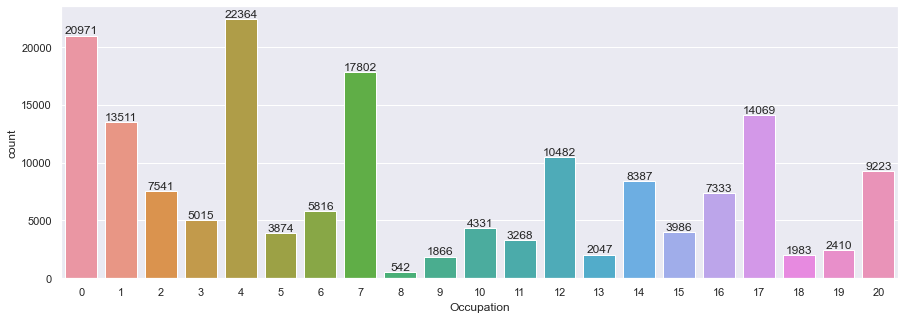

In [46]:
ax =sns.countplot(data=df,x='Occupation')
sns.set(rc={'figure.figsize':(15,6)})

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

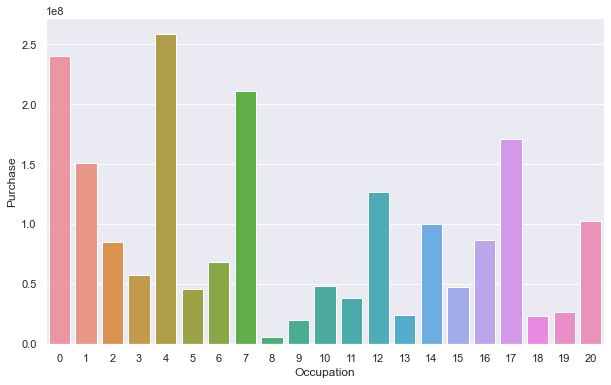

In [47]:
sale_occ=df.groupby(['Occupation'],as_index=False)['Purchase'].sum().sort_values(by='Purchase',ascending=False)

sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x='Occupation', y= 'Purchase',data=sale_occ)

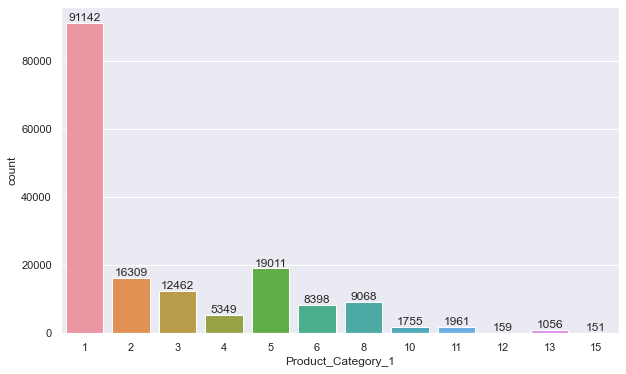

In [48]:
ax =sns.countplot(data=df,x='Product_Category_1')
sns.set(rc={'figure.figsize':(15,6)})

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

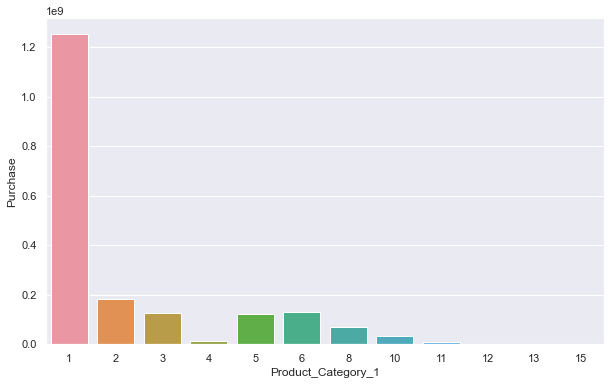

In [49]:
sale_cat=df.groupby(['Product_Category_1'],as_index=False)['Purchase'].sum().sort_values(by='Purchase',ascending=False)

sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x='Product_Category_1', y= 'Purchase',data=sale_cat)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

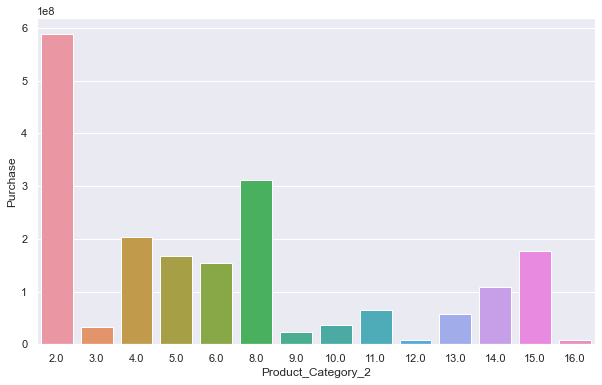

In [52]:
sale_cat2=df.groupby(['Product_Category_2'],as_index=False)['Purchase'].sum().sort_values(by='Purchase',ascending=False)

sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x='Product_Category_2', y= 'Purchase',data=sale_cat2)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

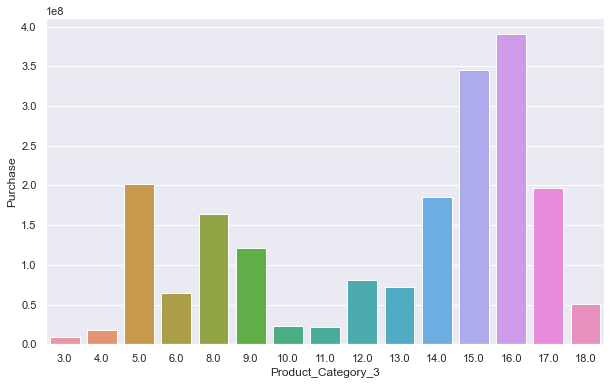

In [53]:
sale_cat3=df.groupby(['Product_Category_3'],as_index=False)['Purchase'].sum().sort_values(by='Purchase',ascending=False)

sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x='Product_Category_3', y= 'Purchase',data=sale_cat3)

#### Top products

<AxesSubplot:xlabel='Product_ID', ylabel='Purchase'>

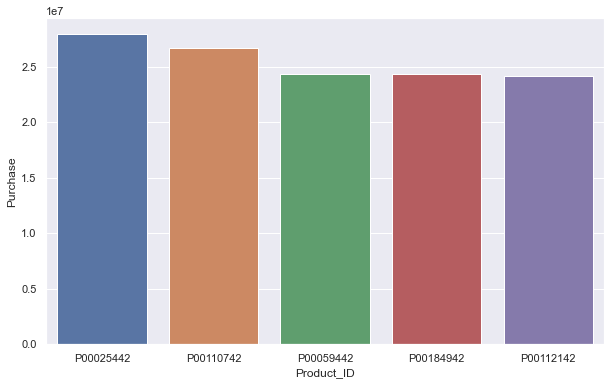

In [50]:
sale_pro=df.groupby(['Product_ID'],as_index=False)['Purchase'].sum().sort_values(by='Purchase',ascending=False).head(5)

sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x='Product_ID', y= 'Purchase',data=sale_pro)

### Conculsion: 


#### Men who are married between age 26-25 from state A , B working in sector 4 and 0 are more likely to buy product 2 from categroy 2 anf product 1 from category 1.